In [20]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
url = "https://github.com/justin-2028/Total-Emissions-Per-Country-2000-2020/blob/main/Total%20Emissions%20Per%20Country%20(2000-2020).csv?raw=True"
df = pd.read_csv(url)
print(len(df))
df.head(10)

58765


,Area,Item,Element,Unit,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,Crop Residues,Direct emissions (N2O),kilotonnes,0.5200,0.5267,0.8200,0.9988,0.8225,1.1821,...,1.0321,1.3726,1.4018,1.4584,1.2424,1.1940,1.0617,0.8988,1.2176,1.3170
1,Afghanistan,Crop Residues,Indirect emissions (N2O),kilotonnes,0.1170,0.1185,0.1845,0.2247,0.1851,0.2660,...,0.2322,0.3088,0.3154,0.3281,0.2795,0.2687,0.2389,0.2022,0.2740,0.2963
2,Afghanistan,Crop Residues,Emissions (N2O),kilotonnes,0.6370,0.6452,1.0045,1.2235,1.0075,1.4481,...,1.2643,1.6815,1.7173,1.7865,1.5220,1.4627,1.3005,1.1011,1.4916,1.6133
3,Afghanistan,Crop Residues,Emissions (CO2eq) from N2O (AR5),kilotonnes,168.8070,170.9884,266.1975,324.2195,266.9995,383.7498,...,335.0379,445.5958,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284
4,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),kilotonnes,168.8070,170.9884,266.1975,324.2195,266.9995,383.7498,...,335.0379,445.5958,455.0727,473.4174,403.3181,387.6130,344.6447,291.7838,395.2689,427.5284
5,Afghanistan,Rice Cultivation,Emissions (CH4),kilotonnes,18.2000,16.9400,18.9000,20.3000,27.3000,22.4000,...,29.4000,28.7000,28.7000,30.8000,22.9600,16.6600,15.3233,16.4555,17.8542,20.6577
6,Afghanistan,Rice Cultivation,Emissions (CO2eq) from CH4 (AR5),kilotonnes,509.6000,474.3200,529.2000,568.4000,764.4000,627.2000,...,823.2000,803.6000,803.6000,862.4000,642.8800,466.4800,429.0518,460.7529,499.9176,578.4156
7,Afghanistan,Rice Cultivation,Emissions (CO2eq) (AR5),kilotonnes,509.6000,474.3200,529.2000,568.4000,764.4000,627.2000,...,823.2000,803.6000,803.6000,862.4000,642.8800,466.4800,429.0518,460.7529,499.9176,578.4156
8,Afghanistan,Burning - Crop residues,Emissions (CH4),kilotonnes,2.6471,2.3205,2.3553,3.4017,3.0089,3.4752,...,3.2219,3.4035,3.4506,3.5413,2.9452,3.0734,2.7997,2.1390,2.9693,3.4826
9,Afghanistan,Burning - Crop residues,Emissions (CH4),kilotonnes,NaN,NaN,NaN,NaN,NaN,10.0700,...,NaN,NaN,5.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df.shape

(58765, 25)

In [23]:
df[df == 0] = np.nan

In [24]:
df.isnull().sum()

Area           0
Item           0
Element        0
Unit           0
2000       10617
2001       12830
2002       12683
2003       12499
2004       12609
2005       12191
2006       12211
2007       12076
2008       12248
2009       12179
2010       11706
2011       12342
2012       11852
2013       12104
2014       12052
2015       12104
2016       12285
2017       12328
2018       12452
2019       12429
2020       12930
dtype: int64

In [25]:
df.dropna(axis=0, inplace=True)

In [26]:
df.isnull().sum()

Area       0
Item       0
Element    0
Unit       0
2000       0
2001       0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
2008       0
2009       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
2016       0
2017       0
2018       0
2019       0
2020       0
dtype: int64

In [27]:
df.shape

(43481, 25)

In [28]:
# Applying PCA To the above given dataset
df.columns

Index(['Area', 'Item', 'Element', 'Unit', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

In [29]:
# want to check the output of the type of emissions.
pd.DataFrame(df['Element'].unique().tolist())

,0
0,Direct emissions (N2O)
1,Indirect emissions (N2O)
2,Emissions (N2O)
3,Emissions (CO2eq) from N2O (AR5)
4,Emissions (CO2eq) (AR5)
5,Emissions (CH4)
6,Emissions (CO2eq) from CH4 (AR5)
7,Emissions (CO2)
8,Emissions (CO2eq) from F-gases (AR5)


In [30]:
#description of int variables
df.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,4.348100e+04,4.348100e+04,4.348100e+04,4.348100e+04,4.348100e+04,4.348100e+04,4.348100e+04,4.348100e+04,4.348100e+04,4.348100e+04,...,4.348100e+04,4.348100e+04,4.348100e+04,4.348100e+04,4.348100e+04,4.348100e+04,4.348100e+04,4.348100e+04,4.348100e+04,4.348100e+04
mean,4.883804e+04,4.817383e+04,4.973057e+04,5.069661e+04,5.296261e+04,5.368551e+04,5.542950e+04,5.563884e+04,5.640900e+04,5.660196e+04,...,5.791667e+04,5.869263e+04,5.906591e+04,6.014455e+04,6.046563e+04,6.052546e+04,6.120421e+04,6.227967e+04,6.293784e+04,6.080320e+04
std,5.818691e+05,5.787668e+05,5.938566e+05,6.144644e+05,6.428742e+05,6.590181e+05,6.822574e+05,6.938010e+05,7.090509e+05,7.078351e+05,...,7.526104e+05,7.656316e+05,7.703024e+05,7.824427e+05,7.841921e+05,7.817824e+05,7.920664e+05,8.095190e+05,8.160984e+05,7.867782e+05
min,-3.477871e+06,-3.148175e+06,-3.148175e+06,-3.148175e+06,-3.148175e+06,-3.379504e+06,-3.183029e+06,-3.148175e+06,-3.206885e+06,-3.284492e+06,...,-3.966553e+06,-3.966553e+06,-3.966553e+06,-3.966553e+06,-3.966553e+06,-3.331180e+06,-2.696392e+06,-2.702046e+06,-2.636985e+06,-2.636985e+06
25%,1.678800e+00,1.608400e+00,1.654100e+00,1.748000e+00,1.758200e+00,1.796800e+00,1.819600e+00,1.905000e+00,1.936700e+00,1.994800e+00,...,2.040700e+00,2.104600e+00,2.110000e+00,2.109200e+00,2.200600e+00,2.239100e+00,2.230800e+00,2.218400e+00,2.307600e+00,2.292600e+00
50%,6.662490e+01,6.337900e+01,6.630240e+01,6.951820e+01,7.028100e+01,7.431580e+01,7.435990e+01,7.790720e+01,7.800520e+01,7.951750e+01,...,8.187690e+01,8.327860e+01,8.370320e+01,8.518150e+01,8.616890e+01,8.866300e+01,8.923670e+01,8.953530e+01,8.936710e+01,9.116280e+01
75%,2.000795e+03,1.948389e+03,2.035267e+03,2.079660e+03,2.106866e+03,2.169814e+03,2.218620e+03,2.268439e+03,2.287093e+03,2.295209e+03,...,2.351776e+03,2.400690e+03,2.393088e+03,2.429552e+03,2.448403e+03,2.484698e+03,2.503852e+03,2.510224e+03,2.547617e+03,2.526562e+03
max,3.880104e+07,3.858777e+07,3.977286e+07,4.107819e+07,4.314763e+07,4.407000e+07,4.578420e+07,4.632066e+07,4.721273e+07,4.713105e+07,...,4.913564e+07,4.995763e+07,5.014924e+07,5.110725e+07,5.127620e+07,5.182366e+07,5.252879e+07,5.370033e+07,5.414186e+07,5.201086e+07


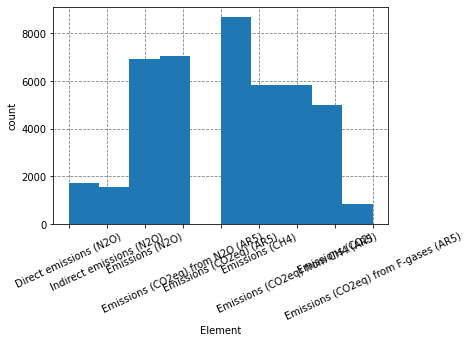

In [35]:
#histogram plot of elements
fig, ax = plt.subplots()
ax.hist(df.Element)
ax.set_axisbelow(True)  # Show the grid lines behind the histogram
ax.grid(which='major', color='grey', linestyle='--')
ax.set_xlabel('Element')
ax.set_ylabel('count')
# Rotating X-axis labels
plt.xticks(rotation = 25)
plt.show()


<AxesSubplot:xlabel='Element', ylabel='2018'>

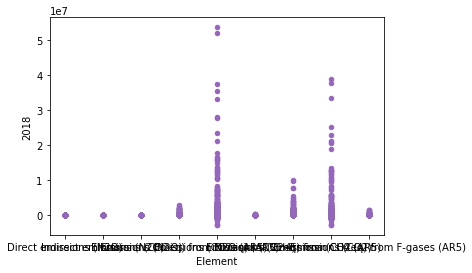

In [33]:

df = df.rename(columns={'Element MEDV': 'Element_MEDV'})
df.plot.scatter(x='Element', y='2018', color='C4', legend=False)

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Select the columns that we want to use for PCA
columns = ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']


pca_df = df[columns]

# Replace missing values with mean imputation
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(pca_df), columns= pca_df.columns)

# Apply PCA to the imputed data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)


# Apply PCA to the normalized data
pca = PCA()
pca.fit(X_pca)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio
print(explained_variance_ratio)

[0.98968336 0.01031664]


Random forest, 

In [19]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary
import graphviz